# Test Data Cleaning 

In [2]:
# import libraries
library(data.table)
library(ggplot2)

In [3]:
# Import train data using data.table fread function
wind.dt <- fread("data/test_data.csv") 

cat("Number of NA values: ", sum(is.na(wind.dt)))
summary(wind.dt)
colnames(wind.dt)

Number of NA values:  8570

 tracking_id          datetime         wind_speed(m/s)  
 Length:12086       Length:12086       Min.   :-525.53  
 Class :character   Class :character   1st Qu.:  21.81  
 Mode  :character   Mode  :character   Median :  93.34  
                                       Mean   :  69.38  
                                       3rd Qu.:  95.25  
                                       Max.   : 525.43  
                                       NA's   :126      
 atmospheric_temperature(°C) shaft_temperature(°C) blades_angle(°)   
 Min.   :-99.0000            Min.   :-99.00        Min.   :-99.0000  
 1st Qu.:  8.1182            1st Qu.: 41.64        1st Qu.: -1.1918  
 Median : 16.1772            Median : 43.71        Median : -0.4971  
 Mean   :  0.6874            Mean   : 39.94        Mean   : -9.2185  
 3rd Qu.: 23.8551            3rd Qu.: 45.76        3rd Qu.:  6.2323  
 Max.   : 80.4422            Max.   :183.30        Max.   :170.0478  
 NA's   :1427                NA's   :1             NA'

[1] "tracking_id"                   "datetime"                     
 [3] "wind_speed(m/s)"               "atmospheric_temperature(°C)"  
 [5] "shaft_temperature(°C)"         "blades_angle(°)"              
 [7] "gearbox_temperature(°C)"       "engine_temperature(°C)"       
 [9] "motor_torque(N-m)"             "generator_temperature(°C)"    
[11] "atmospheric_pressure(Pascal)"  "area_temperature(°C)"         
[13] "windmill_body_temperature(°C)" "wind_direction(°)"            
[15] "resistance(ohm)"               "rotor_torque(N-m)"            
[17] "turbine_status"                "cloud_level"                  
[19] "blade_length(m)"               "blade_breadth(m)"             
[21] "windmill_height(m)"

In [4]:
# get rid of brackets and units in columns
remove_brackets <- function(x) {  
  gsub("\\(.*?\\)", "", x)
  }
colnames(wind.dt) <- sapply(colnames(wind.dt), remove_brackets)
colnames(wind.dt)

[1] "tracking_id"               "datetime"                 
 [3] "wind_speed"                "atmospheric_temperature"  
 [5] "shaft_temperature"         "blades_angle"             
 [7] "gearbox_temperature"       "engine_temperature"       
 [9] "motor_torque"              "generator_temperature"    
[11] "atmospheric_pressure"      "area_temperature"         
[13] "windmill_body_temperature" "wind_direction"           
[15] "resistance"                "rotor_torque"             
[17] "turbine_status"            "cloud_level"              
[19] "blade_length"              "blade_breadth"            
[21] "windmill_height"

In [5]:
# Datetime column is in object format. It should be converted into datetime format

get_year <- function(x) {  
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$year + 1900 # based on 1990
}
get_month <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$mon + 1 # 0 index
}
get_mday <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$mday
}
get_wday <- function(x){
  # The wday component of a POSIXlt object is the numeric weekday (0-6 starting on Sunday).
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$wday
}
get_hour <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$hour
}
get_min <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$min
}
get_sec <- function(x){
  as.POSIXlt(x,format="%Y-%m-%d %H:%M:%S")$sec
}

wind.dt$year <- unlist(lapply(wind.dt$datetime, get_year))
wind.dt$month <- unlist(lapply(wind.dt$datetime, get_month))
wind.dt$mday <- unlist(lapply(wind.dt$datetime, get_mday))
wind.dt$wday <- unlist(lapply(wind.dt$datetime, get_wday))
wind.dt$hour <- unlist(lapply(wind.dt$datetime, get_hour))
wind.dt$min <- unlist(lapply(wind.dt$datetime, get_min))
wind.dt$sec <- unlist(lapply(wind.dt$datetime, get_sec))

wind.dt

tracking_id,datetime,wind_speed,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,⋯,blade_length,blade_breadth,windmill_height,year,month,mday,wday,hour,min,sec
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
WM_19817,2019-04-17 08:53:20,94.32427,17.6411856,89.714193,51.1467876,40.46056,39.59473,1073.2027,66.83004,⋯,3.185837,0.4039655,25.572431,2019,4,17,3,8,53,20
WM_18723,2019-03-30 07:43:20,10.08887,13.9781194,43.272846,46.5163939,40.02779,41.17686,517.4364,37.28416,⋯,3.016603,0.4447555,24.371823,2019,3,30,6,7,43,20
WM_34552,2019-08-10 11:33:20,347.15209,31.4230347,41.076640,26.9316016,43.10912,43.43956,1480.7165,70.01076,⋯,2.611941,0.3873681,27.654677,2019,8,10,6,11,33,20
WM_28570,2019-06-26 03:53:20,24.47200,-99.0000000,14.375078,66.5139525,13.74125,15.57747,887.9795,41.44526,⋯,2.866805,0.4504777,24.189426,2019,6,26,3,3,53,20
WM_36934,2019-08-27 16:43:20,96.99703,33.2818357,41.405192,1.8431115,121.57291,43.93459,2053.9164,68.00779,⋯,3.549672,0.3683548,4.885440,2019,8,27,2,16,43,20
WM_46,2018-10-29 04:43:20,96.42307,38.5535012,98.687024,-99.0000000,43.73739,44.77544,2634.5901,77.20162,⋯,4.548065,0.4291832,19.978531,2018,10,29,1,4,43,20
WM_5545,2018-12-16 15:13:20,95.93235,-99.0000000,45.337007,12.3294675,42.43678,44.92419,1888.0035,71.51235,⋯,4.676314,0.4132884,24.156462,2018,12,16,0,15,13,20
WM_6959,2018-12-27 01:53:20,95.13510,NA,46.992644,-99.0000000,48.62100,42.86615,2795.8627,95.10375,⋯,4.982825,0.4175801,15.384053,2018,12,27,4,1,53,20
WM_9565,2019-01-14 13:43:20,34.34664,12.7577640,42.988422,0.7409302,48.91539,45.88976,912.7866,45.54039,⋯,3.625979,0.4486467,25.366011,2019,1,14,1,13,43,20


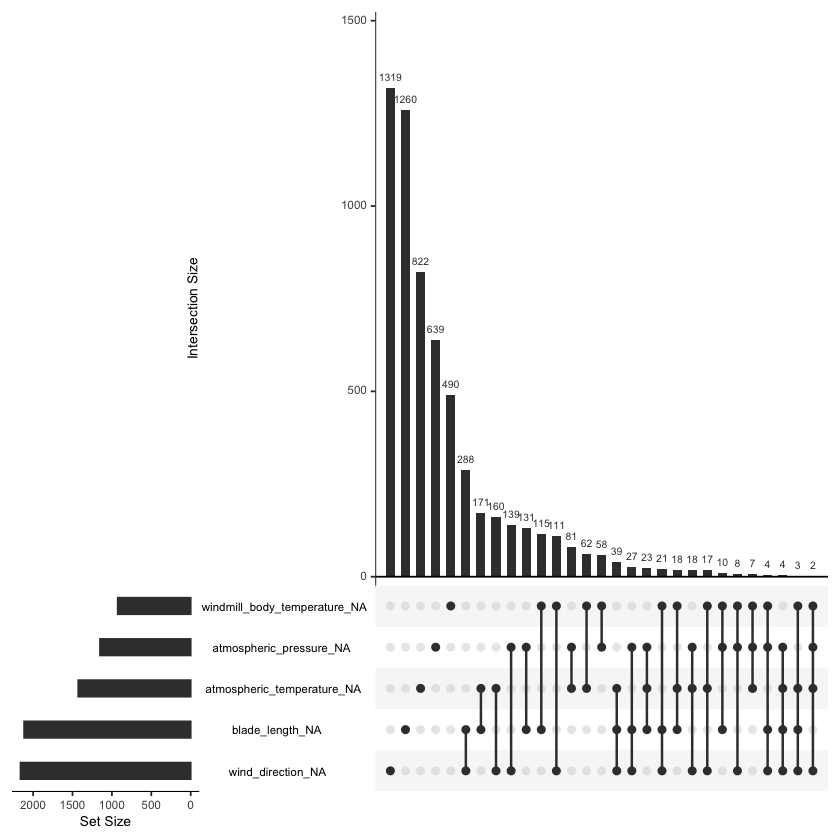

In [7]:
###################
# NA Analysis and Handling
###################
# install.packages("naniar")
library(naniar)
# install.packages("VIM")
library(VIM)

gg_miss_upset(wind.dt) # interesting overview of NA


Warning message in plot.aggr(res, ...):
“not enough vertical space to display frequencies (too many combinations)”



 Variables sorted by number of missings: 
                  Variable        Count
            wind_direction 1.787192e-01
              blade_length 1.749131e-01
   atmospheric_temperature 1.180705e-01
      atmospheric_pressure 9.523416e-02
 windmill_body_temperature 7.661757e-02
              rotor_torque 2.325004e-02
           windmill_height 2.109879e-02
                wind_speed 1.042529e-02
              blades_angle 8.770478e-03
              motor_torque 9.101440e-04
        engine_temperature 4.137018e-04
     generator_temperature 4.137018e-04
         shaft_temperature 8.274036e-05
       gearbox_temperature 8.274036e-05
          area_temperature 8.274036e-05
               tracking_id 0.000000e+00
                  datetime 0.000000e+00
                resistance 0.000000e+00
            turbine_status 0.000000e+00
               cloud_level 0.000000e+00
             blade_breadth 0.000000e+00
                      year 0.000000e+00
                     month 0.000000e+

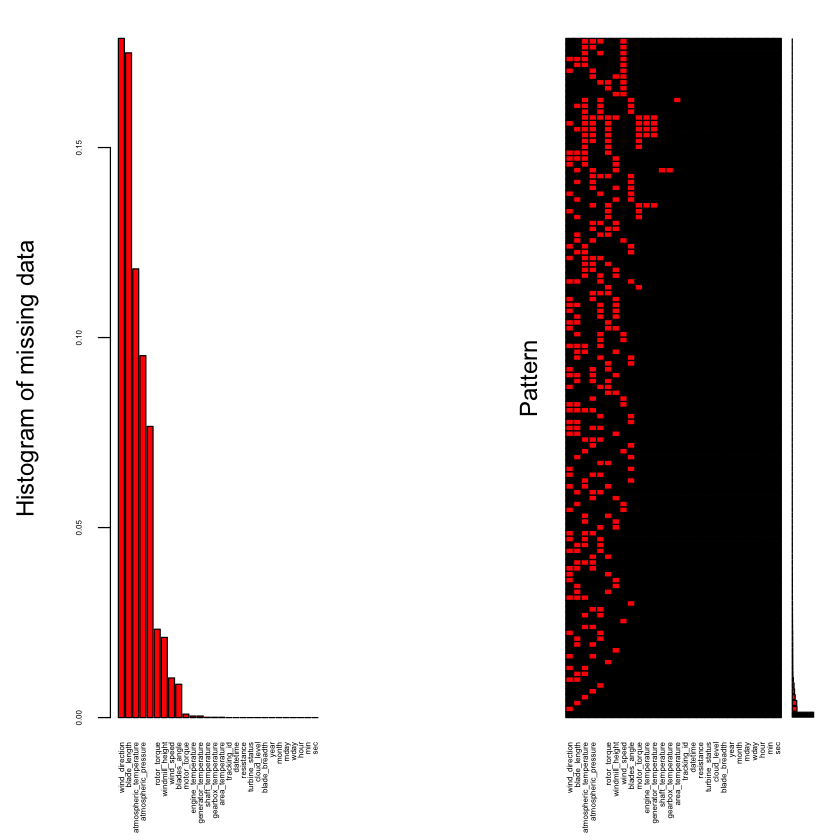

In [8]:
# Missing Values Pattern
aggr_plot <- aggr(wind.dt, col=c('black','red'), 
                  numbers=TRUE, sortVars=TRUE, labels=names(data), 
                  cex.axis=0.4, gap=10, ylab=c("Histogram of missing data","Pattern"))

Missing variables: 

wind_direction, blade_length, atmospheric_temperature, atmospheric_pressure, windmill_body_temperature
rotor_torque windmill_height wind_speed blades_angle motor_torque engine_temperature
generator_temperature shaft_temperature gearbox_temperature area_temperature cloud_level turbine status

In [9]:
# drop column datatime
wind.dt[,datetime:=NULL]

In [20]:
# Data imputation with MICE stochastic regression imputation
library(mice)

wind.dt[wind.dt == ""] <- NA # account for "" as NA

data_imputation = function(data)
{
  # Imputing Numeric missing data using MICE stochastic regression imputation
  imp = mice(wind.dt[,c(2:13,15,18,20)], method = "norm.nob", m = 5, maxit = 5)
  data1 = complete(imp,2)
    
    # Filling missing values in categorical variables using KNN imputer
  imp2 = kNN(wind.dt[,c(16,17)])
  data2 = imp2[,c(1,2)]
  
  # Concatenating all the imputed features
  data1 = cbind(wind.dt[,c(1,14,19,21:27)],data1,data2)
  
  return(data1)
}

data1 <- data_imputation(wind.dt)

sum(is.na(wind.dt)) 
sum(is.na(data1)) # 0


 iter imp variable
  1   1  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  rotor_torque  blade_length  windmill_height
  1   2  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  rotor_torque  blade_length  windmill_height
  1   3  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_torque  generator_temperature  atmospheric_pressure  area_temperature  windmill_body_temperature  wind_direction  rotor_torque  blade_length  windmill_height
  1   4  wind_speed  atmospheric_temperature  shaft_temperature  blades_angle  gearbox_temperature  engine_temperature  motor_to

Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”
Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”
Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”
Warning message in gowerD(don_dist_var, imp_dist_var, weights = weightsx, numericalX, :
“NAs introduced by coercion”


[1] 9492

[1] 0

In [21]:
# Converting character variables to factors, after NAs are removed
data1$turbine_status = as.factor(data1$turbine_status)
# data1$turbine_status <- droplevels(wind.dt$turbine_status)
data1$cloud_level = as.factor(data1$cloud_level) # removes unused "" level
# data1$cloud_level <- droplevels(data1$cloud_level) # removes unused "" level
data1$year = as.factor(data1$year)
data1$month = as.factor(data1$month)
data1$mday = as.factor(data1$mday)
data1$wday = as.factor(data1$wday)


levels(data1$cloud_level)
levels(data1$turbine_status)

[1] "Extremely Low" "Low"           "Medium"

[1] "A"   "A2"  "AAA" "AB"  "ABC" "AC"  "B"   "B2"  "BA"  "BB"  "BBB" "BCB"
[13] "BD"  "D"

numeric(0)

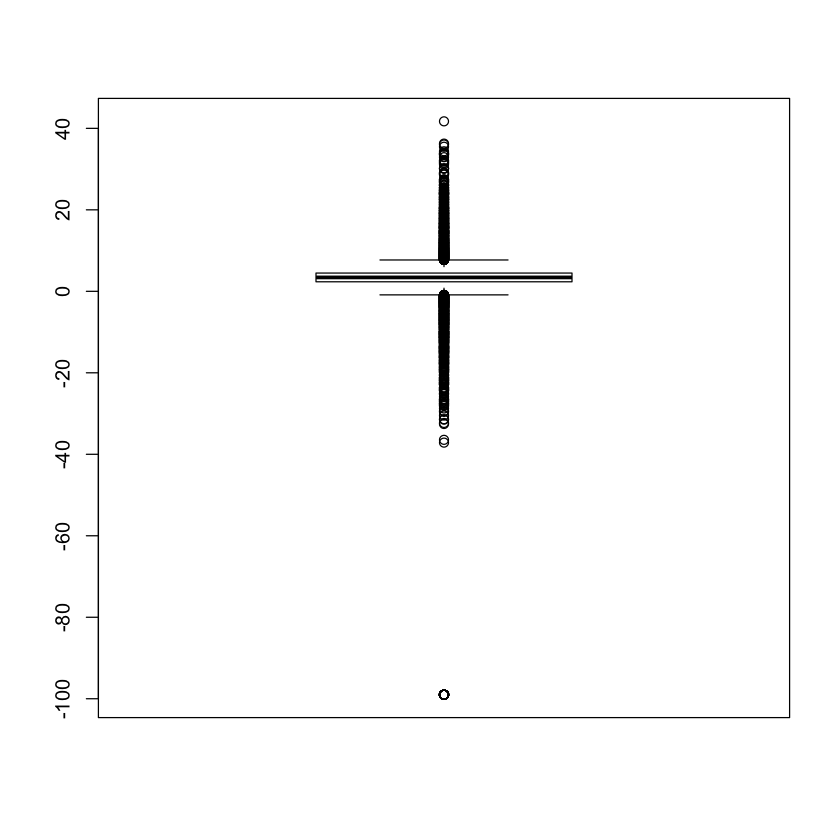

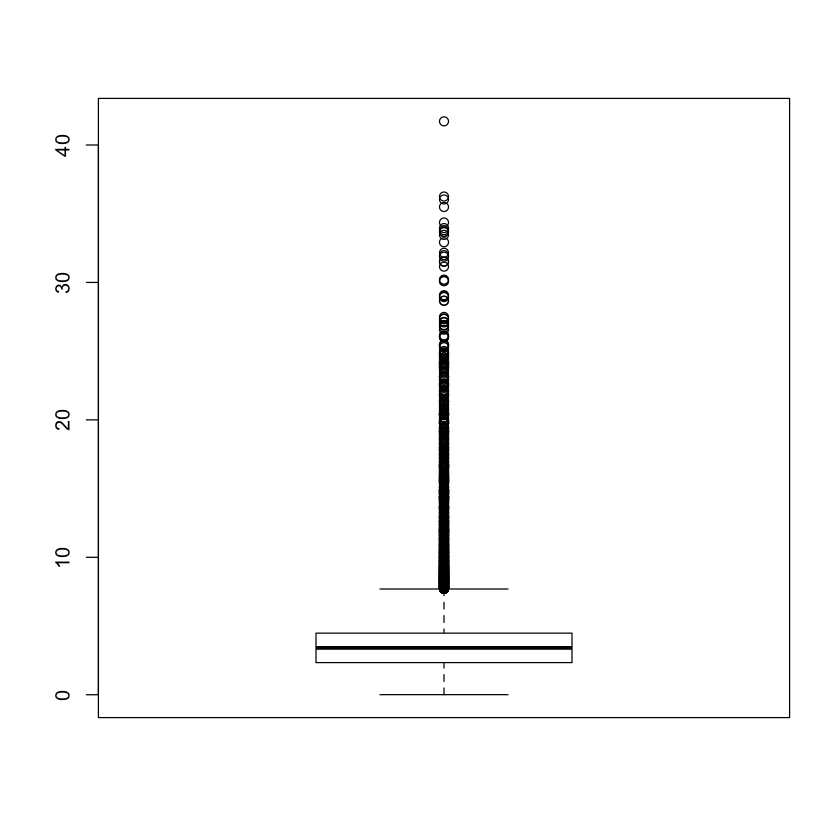

In [22]:
boxplot(data1$blade_length) 
# anomaly is a negative number
# many blade_length values are negative, replace with mean of blade length; refine if needed
data1[blade_length < 0]$blade_length <- mean(data1$blade_length, na.rm = TRUE)
data1[blade_length < 0]$blade_length
boxplot(data1$blade_length)

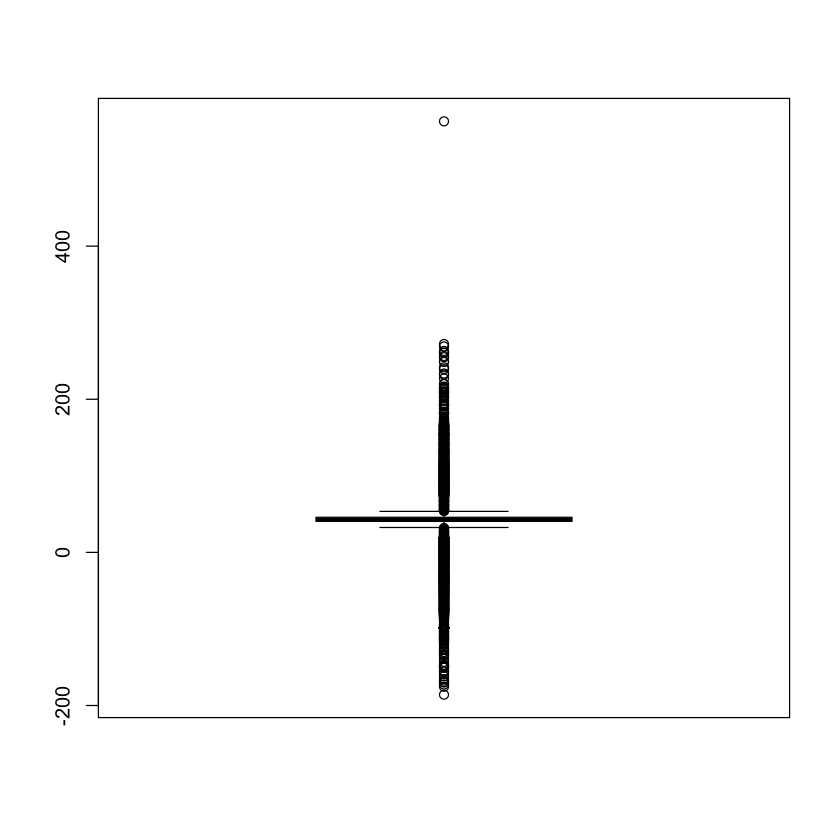

In [23]:
# gearbox_temperature
boxplot(data1$gearbox_temperature)

# individual variable data analysis: interesting findings
# 1. wind_speed, atmospheric_pressure, resistance: negative values exist, which may represent direction
# 2. windmill_height, negative values exist, might represent lower than sea level? 

In [25]:
#one-hot encoding
library(caret)
library(readr)
library(dplyr)


one_hot_encoding = function(data1)
{
    tracking_id = data1$tracking_id
    temp_data = select(data1,turbine_status,cloud_level)
    data = select(data1,-tracking_id,-turbine_status,-cloud_level)
    dmy = dummyVars(" ~. ", data = temp_data, fullRank = F)
    temp_encod_data = data.frame(predict(dmy, newdata = temp_data))
    completed_data = cbind(tracking_id,temp_encod_data,data)
  
    return(completed_data)
}

data2 = one_hot_encoding(data1)
colnames(data2)

[1] "tracking_id"               "turbine_status.A"         
 [3] "turbine_status.A2"         "turbine_status.AAA"       
 [5] "turbine_status.AB"         "turbine_status.ABC"       
 [7] "turbine_status.AC"         "turbine_status.B"         
 [9] "turbine_status.B2"         "turbine_status.BA"        
[11] "turbine_status.BB"         "turbine_status.BBB"       
[13] "turbine_status.BCB"        "turbine_status.BD"        
[15] "turbine_status.D"          "cloud_level.Extremely.Low"
[17] "cloud_level.Low"           "cloud_level.Medium"       
[19] "resistance"                "blade_breadth"            
[21] "year"                      "month"                    
[23] "mday"                      "wday"                     
[25] "hour"                      "min"                      
[27] "sec"                       "wind_speed"               
[29] "atmospheric_temperature"   "shaft_temperature"        
[31] "blades_angle"              "gearbox_temperature"      
[33] "engine_temperature"        "motor_torque"             
[35] "generator_temperature"     "atmospheric_pressure"     
[37] "area_temperature"          "windmill_body_temperature"
[39] "wind_direction"            "rotor_torque"             
[41] "blade_length"              "windmill_height"

In [28]:
# save cleaned CSV file
fwrite(data2, "test.csv")